### Importação dos dados



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
Faturamento_loja_1 = loja['Preço'].sum()
Faturamento_loja_2 = loja2['Preço'].sum()
Faturamento_loja_3 = loja3['Preço'].sum()
Faturamento_loja_4 = loja4['Preço'].sum()
print(Faturamento_loja_1, Faturamento_loja_2, Faturamento_loja_3, Faturamento_loja_4)

1534509.12 1488459.06 1464025.03 1384497.58


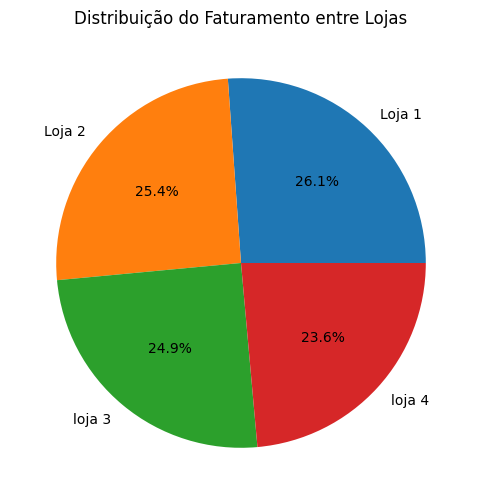

In [3]:
faturamentos = [Faturamento_loja_1, Faturamento_loja_2, Faturamento_loja_3, Faturamento_loja_4]
labels = ['Loja 1', 'Loja 2', 'loja 3', 'loja 4']
plt.figure(figsize=(6, 6))
plt.pie(
    faturamentos,
    labels=labels,
    autopct='%1.1f%%',)

plt.title('Distribuição do Faturamento entre Lojas')
plt.show()

# 2. Vendas por Categoria


In [4]:
Vendas_categoria = loja.groupby('Categoria do Produto')['Preço'].sum()
Vendas_categoria

,Preço
Categoria do Produto,
brinquedos,23993.78
eletrodomesticos,484913.36
eletronicos,572659.23
esporte e lazer,52387.55
instrumentos musicais,121731.69
livros,11713.92
moveis,250178.11
utilidades domesticas,16931.48


In [5]:
lojas = [loja, loja2, loja3, loja4]
vendas_por_categoria = {}

for i, df_loja in enumerate(lojas, start=1):
    vendas_por_categoria[f'Loja {i}'] = df_loja['Categoria do Produto'].value_counts()
for nome_loja, contagem in vendas_por_categoria.items():
    print(f"\n{nome_loja}:")
    print(contagem)


Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Loja 4:
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer    

# 3. Média de Avaliação das Lojas

In [6]:
lojas = [loja, loja2, loja3, loja4]
avaliacoes = []

for i, df_loja in enumerate(lojas, start=1):
    media = df_loja['Avaliação da compra'].mean()
    avaliacoes.append(media)
    print(f"Média de avaliações da Loja {i}: {media:.2f}")

Média de avaliações da Loja 1: 3.98
Média de avaliações da Loja 2: 4.04
Média de avaliações da Loja 3: 4.05
Média de avaliações da Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [7]:
lojas = [loja, loja2, loja3, loja4]
vendas_por_categoria = {}

for i, df_loja in enumerate(lojas, start=1):
    vendas_por_categoria[f'Loja {i}'] = df_loja['Produto'].value_counts()
for nome_loja, contagem in vendas_por_categoria.items():
    print(f"\n{nome_loja}:                       QTd" )
    print(contagem)


Loja 1:                       QTd
Produto
Micro-ondas                    60
TV Led UHD 4K                  60
Guarda roupas                  60
Secadora de roupas             58
Cômoda                         56
Blocos de montar               56
Bola de basquete               55
Bicicleta                      54
Copo térmico                   54
Geladeira                      54
Impressora                     54
Bateria                        53
Faqueiro                       52
Carrinho controle remoto       52
Modelagem preditiva            51
Fone de ouvido                 50
Xadrez de madeira              49
Celular Plus X42               49
Lava louças                    48
Lavadora de roupas             47
Guitarra                       47
Violão                         46
Sofá retrátil                  46
Cadeira de escritório          46
Fogão                          45
Cama box                       44
Kit banquetas                  44
Smart TV                       44
Cama 

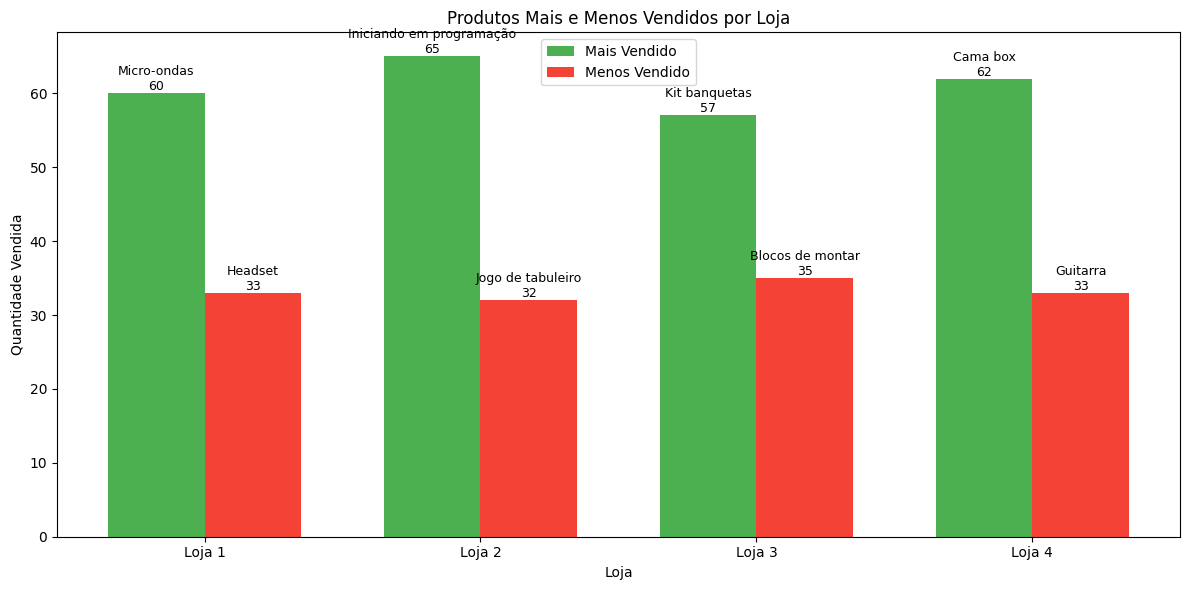

In [8]:
lojas = [loja, loja2, loja3, loja4]
df_resultados = pd.DataFrame([
    {
        'Loja': f'Loja {i}',
        'Produto Mais Vendido': df['Produto'].value_counts().idxmax(),
        'Qtd Mais Vendido': df['Produto'].value_counts().max(),
        'Produto Menos Vendido': df['Produto'].value_counts()[df['Produto'].value_counts() > 0].idxmin(),
        'Qtd Menos Vendido': df['Produto'].value_counts()[df['Produto'].value_counts() > 0].min()
    }
    for i, df in enumerate(lojas, start=1)
])

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = range(len(df_resultados))

# Barras
for col, color, label in [('Qtd Mais Vendido', '#4CAF50', 'Mais Vendido'),
                          ('Qtd Menos Vendido', '#F44336', 'Menos Vendido')]:
    bars = ax.bar([i + (bar_width if col == 'Qtd Menos Vendido' else 0) for i in index],
                  df_resultados[col], bar_width, label=label, color=color)
    for bar, produto in zip(bars, df_resultados[f'Produto {label.split()[0]} Vendido']):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                f'{produto}\n{bar.get_height()}', ha='center', va='bottom', fontsize=9)

# Configurações do gráfico
ax.set(xlabel='Loja', ylabel='Quantidade Vendida',
       title='Produtos Mais e Menos Vendidos por Loja')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(df_resultados['Loja'])
ax.legend()
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [9]:
lojas = [loja, loja2, loja3, loja4]
medias_frete = {}

for i, df_loja in enumerate(lojas, start=1):
    media_frete = df_loja['Frete'].mean()
    medias_frete[f'Loja {i}'] = media_frete
    print(f"Média de frete da Loja {i}: R${media_frete:.2f}")

Média de frete da Loja 1: R$34.69
Média de frete da Loja 2: R$33.62
Média de frete da Loja 3: R$33.07
Média de frete da Loja 4: R$31.28


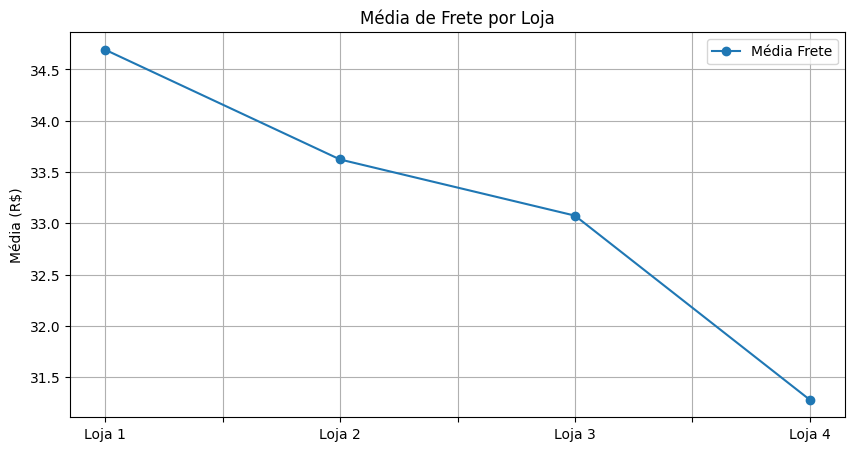

In [10]:
df_medias = pd.DataFrame.from_dict(medias_frete, orient='index', columns=['Média Frete'])
df_medias.plot(kind='line', marker='o', figsize=(10, 5), title='Média de Frete por Loja')
plt.ylabel("Média (R$)")
plt.grid(True)
plt.show()

# Relatório Final

Com base nas análises realizadas e nos gráficos gerados, seguem os resultados finais para auxílio na decisão do Sr. João.

## 1. Faturamento total das lojas e distribuição percentual

| Loja   | Faturamento (R$) | Percentual |
|--------|------------------|------------|
| Loja 1 | 1.534.509,12     | 26,1%      |
| Loja 2 | 1.488.459,06     | 25,4%      |
| Loja 3 | 1.464.025,03     | 24,9%      |
| Loja 4 | 1.384.497,58     | 23,6%      |

*Observação: A soma dos percentuais pode não totalizar 100% devido a arredondamentos.*

## 2. Categorias de produtos mais e menos vendidas por loja

**Loja 1:**
- **Mais vendida:** Móveis (465 unidades)
- **Menos vendida:** Utilidades Domésticas (171 unidades)

**Loja 2:**
- **Mais vendida:** Móveis (442 unidades)
- **Menos vendida:** Utilidades Domésticas (181 unidades)

**Loja 3:**
- **Mais vendida:** Móveis (499 unidades)
- **Menos vendida:** Utilidades Domésticas (177 unidades)

**Loja 4:**
- **Mais vendida:** Móveis (480 unidades)
- **Menos vendida:** Instrumentos Musicais (170 unidades)

## 3. Média das avaliações de clientes por loja

| Loja   | Média de Avaliação |
|--------|--------------------|
| Loja 1 | 3,98               |
| Loja 2 | 4,04               |
| Loja 3 | 4,05               |
| Loja 4 | 4,00               |

## 4. Produtos mais e menos vendidos por loja

**Loja 1:**
- **Mais vendido:** Micro-ondas
- **Menos vendido:** Headset

**Loja 2:**
- **Mais vendido:** Iniciando em Programação
- **Menos vendido:** Jogo de Tabuleiro

**Loja 3:**
- **Mais vendido:** Kit Banquetas
- **Menos vendido:** Blocos de Montar

**Loja 4:**
- **Mais vendido:** Cama Box
- **Menos vendido:** Guitarra

## 5. Frete médio por loja

| Loja   | Frete Médio (R$) |
|--------|------------------|
| Loja 1 | 34,69            |
| Loja 2 | 33,62            |
| Loja 3 | 33,07            |
| Loja 4 | 31,28            |


# Loja indicada para venda: Loja 4

**Motivos principais:**  
- 1. **Menor faturamento** (23,6% do total, R$ 1.384.497,58).   

- 3. **Avaliação intermediária** (4,00), sem se destacar frente às outras.  
- 4. **Frete mais baixo** (R$ 31,28), o que pode ser um atrativo para compradores.  
- 5. **Estratégia de foco**: vender a loja de menor desempenho permite concentrar recursos nas demais (1, 2 e 3), que têm faturamento superior e avaliações consistentes.  

**Recomendação final:**  
Vender a Loja 4, mantendo as outras para otimizar o portfólio, mas validando antes fatores locais e oportunidades de valorização do negócio.